In [22]:
# Import and set up
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns


In [23]:
# Load the dataset
dataset = pd.read_csv('data_train.csv')

X = dataset.drop(['Status', 'Id'], axis=1)
Y = dataset[['Status']]

In [24]:
# create testing and training data for RM variable
from sklearn.model_selection import train_test_split
trainX, subsetX, trainY, subsetY = train_test_split(np.array(X), np.array(Y), test_size=0.4)
validateX, testX, validateY, testY = train_test_split(np.array(subsetX), np.array(subsetY), test_size=0.5)

In [25]:
# Apply Polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainX)

polyX = scaler.transform(trainX)
poly_valid_X = scaler.transform(validateX)


In [26]:
# Regularisation and train
lambda_paras = np.logspace(-5, 5, num=25)    # establish the lambda values to test (grid)
# Then search
train_performace = list()
valid_performace = list()
for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
    clf.fit(polyX, trainY.ravel())        #train the classifier
    
    train_pred = clf.predict(polyX)
    train_f1 = f1_score(trainY, train_pred, average='macro')   #calculate the train f1-score
    
    val_pred = clf.predict(poly_valid_X)
    val_f1 = f1_score(validateY, val_pred, average='macro')         #calculate the validation f1-score
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)


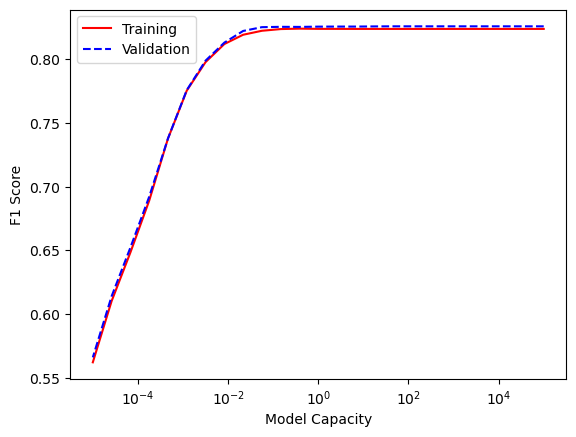

In [27]:
# Plot the f1 scores
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()



In [34]:
# The value 10^-2 is the most compatible value
# Retrain the model with the chosen lambda

clf = LogisticRegression(penalty='l2', C = 1.0/10**(-2), 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
clf.fit(polyX, trainY.ravel())        #train the classifier
    
train_pred = clf.predict(polyX)
train_f1 = f1_score(trainY, train_pred, average='macro')   #calculate the train f1-score
    
val_pred = clf.predict(poly_valid_X)
val_f1 = f1_score(validateY, val_pred, average='macro')         #calculate the validation f1-score
    
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.824
Validation F1-Score score: 0.826


In [35]:
# Classification Report
from sklearn.metrics import classification_report

test_pred = clf.predict(testX)
    
print(classification_report(testY, test_pred,))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     33357
           1       0.35      0.95      0.51      7232

    accuracy                           0.67     40589
   macro avg       0.66      0.78      0.63     40589
weighted avg       0.87      0.67      0.71     40589



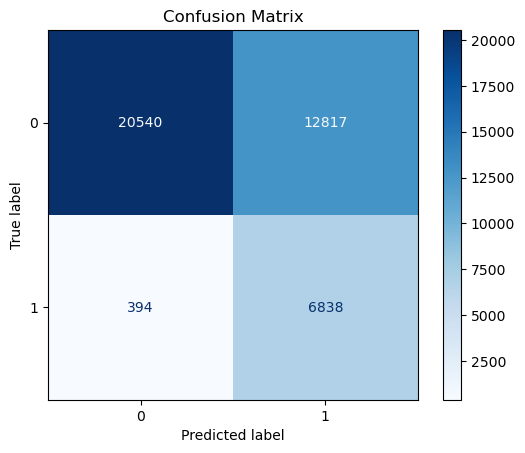

In [36]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testY, test_pred)
# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()